In [1]:
# To ignore warnings
import warnings
warnings.filterwarnings("ignore")


In [2]:
#Necessary Libraries
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline

In [3]:
#Loading data
data = keras.datasets.mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [4]:
#spliting the data
(X_train, y_train), (X_test, y_test) = data

In [5]:
#checking length
len(X_train)

60000

In [6]:
len(X_test)

10000

In [7]:
#checking shape
X_train[0].shape

(28, 28)

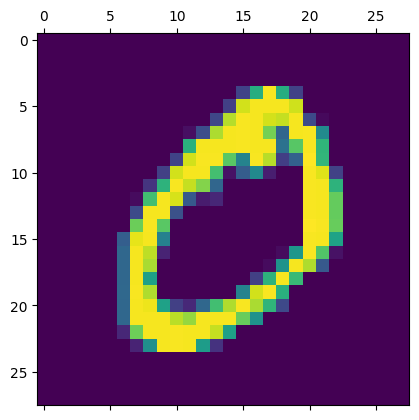

In [8]:
#Seeing the image in train dataset
plt.matshow(X_train[1])

In [11]:
#seeing the corresponding answer
y_train[1]

0

In [16]:
#flatting the dataset to convert the dataset into 1-d form
X_train.shape


(60000, 28, 28)

In [17]:
X_test.shape

(10000, 28, 28)

In [18]:
X_train_flattended = X_train.reshape(len(X_train),28*28)
X_test_flattended = X_test.reshape(len(X_test),28*28)

In [14]:
X_train_flattended.shape

(60000, 784)

In [19]:
X_test_flattended.shape

(10000, 784)

In [21]:
#Creating Simple Nerual Netwrok
model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,),activation="sigmoid")
])
model.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)
model.fit(X_train_flattended,y_train,epochs=5)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7730 - loss: 17.1463
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8756 - loss: 6.2804
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8860 - loss: 5.5560
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8894 - loss: 5.1693
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.8877 - loss: 5.0869


In [22]:
#Improving accruracy by doing the scaling
X_train_scaled = X_train_flattended/255
X_test_scaled = X_test_flattended/255

In [23]:
X_train_scaled

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [24]:
X_test_scaled

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [25]:
#After Scaling the data
model1 = keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,),activation="sigmoid")
])
model1.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)
model1.fit(X_train_scaled,y_train,epochs=5)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8102 - loss: 0.7240
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.9129 - loss: 0.3135
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9218 - loss: 0.2823
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9249 - loss: 0.2711
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.9263 - loss: 0.2604


In [26]:
#Evaluating on the test
model1.evaluate(X_test_scaled,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9146 - loss: 0.3038


[0.2685679793357849, 0.9254000186920166]

In [27]:
model.evaluate(X_test_flattended,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8244 - loss: 9.2547


[8.352066040039062, 0.8457000255584717]

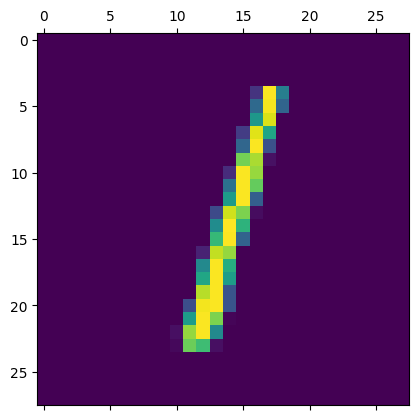

In [29]:
#checking prediction
plt.matshow(X_test[2])

In [33]:
y_predicted = model1.predict(X_test_flattended)
y_predicted[2]

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


array([0., 1., 1., 0., 0., 0., 0., 0., 1., 0.], dtype=float32)

In [34]:
np.argmax(y_predicted[2])

1

In [35]:
#now creating confusion matrix
#for that we have to convert y_predicted from the whole number to simple int and for that we use list compression
y_predicted_labels = [np.argmax(i) for i in y_predicted]
y_predicted_labels[:5]

[3, 2, 1, 0, 4]

In [36]:
y_test[:5]

array([7, 2, 1, 0, 4], dtype=uint8)

In [37]:
cm=tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 973,    0,    0,    1,    0,    2,    1,    0,    3,    0],
       [   0, 1119,    6,    2,    0,    2,    2,    1,    3,    0],
       [  58,   78,  858,    7,   12,    0,    3,    1,   13,    2],
       [  28,    5,  206,  759,    1,    3,    0,    2,    6,    0],
       [   6,    2,   11,   21,  928,    0,    4,    0,    9,    1],
       [  47,    7,   35,  297,   31,  449,    8,    0,   17,    1],
       [  66,    3,  244,    3,   72,   66,  501,    1,    2,    0],
       [  18,   16,   64,  410,   59,    5,    0,  449,    6,    1],
       [  15,   23,   76,  222,   24,   82,   24,    8,  500,    0],
       [  13,   11,    2,  124,  430,    7,    0,  216,  123,   83]],
      dtype=int32)>

Text(95.72222222222221, 0.5, 'Truth')

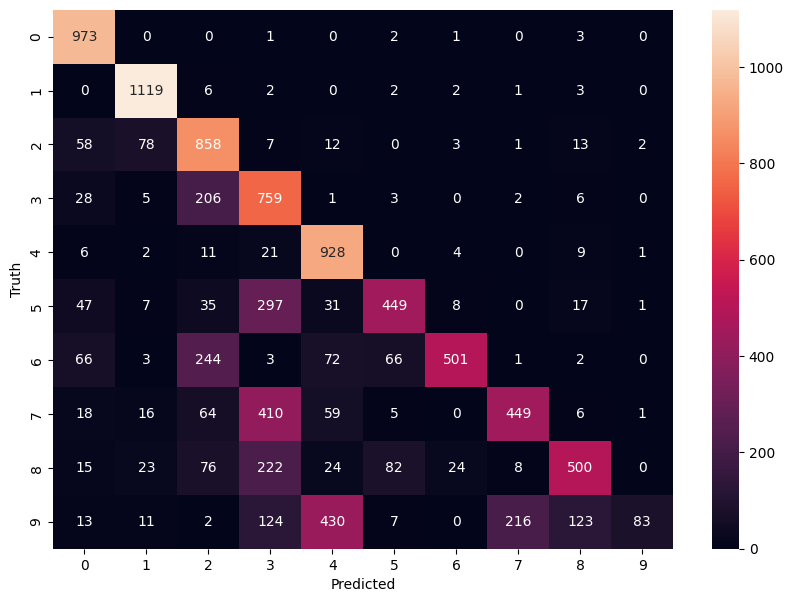

In [38]:
#cm into visualizing form
import seaborn as sns
plt.figure(figsize=(10,7))
sns.heatmap(cm,annot=True,fmt="d")
plt.xlabel("Predicted")
plt.ylabel("Truth")

In [39]:
#To improve more accuracy we increase the hidden layer in the model
model2 = keras.Sequential([
    keras.layers.Dense(100, input_shape=(784,),activation="relu"),
    keras.layers.Dense(10,activation="sigmoid")
])
model2.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)
model2.fit(X_train_scaled,y_train,epochs=5)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8759 - loss: 0.4413
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.9641 - loss: 0.1226
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9765 - loss: 0.0823
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9819 - loss: 0.0639
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9855 - loss: 0.0480


In [41]:
model2.evaluate(X_test_scaled,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9710 - loss: 0.0987


[0.08543729037046432, 0.9750000238418579]

In [43]:
y_predicted_layers = model2.predict(X_test_scaled)
y_predicted_layers[2]

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


array([0.001228  , 0.99320453, 0.31421736, 0.02124124, 0.00318453,
       0.00883978, 0.01228314, 0.531784  , 0.28282493, 0.00119816],
      dtype=float32)

In [44]:
np.argmax(y_predicted_layers[2])

1

In [45]:
y_predicted_layers_labels = [np.argmax(i) for i in y_predicted_layers]
y_predicted_layers_labels[:5]

[7, 2, 1, 0, 4]

In [46]:
y_test[:5]

array([7, 2, 1, 0, 4], dtype=uint8)

In [47]:
cm=tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_layers_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 966,    0,    4,    0,    0,    1,    3,    1,    3,    2],
       [   0, 1099,    9,    4,    0,    1,    4,    1,   17,    0],
       [   1,    0, 1011,    5,    1,    1,    0,    5,    8,    0],
       [   0,    0,    2,  992,    0,    5,    0,    5,    3,    3],
       [   0,    0,    5,    1,  952,    1,    4,    3,    4,   12],
       [   2,    0,    0,    4,    1,  874,    5,    1,    4,    1],
       [   2,    1,    3,    2,    1,    3,  943,    0,    3,    0],
       [   1,    0,   13,    3,    0,    1,    0, 1000,    4,    6],
       [   4,    0,    3,    5,    1,    6,    2,    2,  951,    0],
       [   2,    4,    0,    8,    3,    8,    1,    6,   15,  962]],
      dtype=int32)>

Text(95.72222222222221, 0.5, 'Truth')

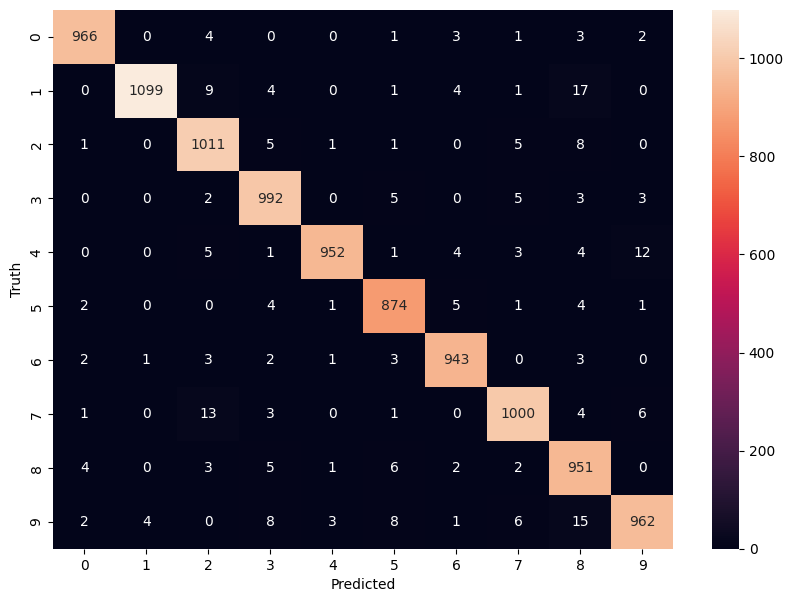

In [48]:
#cm into visualizing form
import seaborn as sns
plt.figure(figsize=(10,7))
sns.heatmap(cm,annot=True,fmt="d")
plt.xlabel("Predicted")
plt.ylabel("Truth")